# Trabalho Final - Modelos de IA e Machine Learning

### Integrantes:

###    1) Jurandir Ventura - RM336634
###    2) Marcelo Preto - RM336632
###    3) Fabio Rizzi - RM336656
###    4) Thiago Alexandre – RM336583

# Exercício 3

Utilizando o dataset zoo.csv (disponível no repositório da disciplina), faça a classificação de todas as amostras dos animais presentes.

Avalie a precisão, a acurácia e o melhor ‘k’ para este problema.

Dica, para ler o arquivo csv utilize o seguinte comando:

zoo = pd.read_csv(‘c:/caminhodoarquivo/zoo.csv', engine='python')

In [16]:
#Importando as bibliotecas. Se houver algum erro, use "pip install Libname"
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [17]:
#Leitura do dataset .csv

#Lembrar que a origem da dataset é uma variável.
#Neste caso é proveniente da pasta de datasets do Github: https://github.com/fiapIA/modelos_de_ia_e_ml/data

dataset = pd.read_csv('data/3_zoo.csv')

#Visualização das 10 primeiras linhas do dataset
dataset.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [18]:
# Analisando o tamanho do dataset

dataset.shape

(101, 18)

In [19]:
# Visão geral dos dados (com DataType)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [20]:
# Verificaçõ se tem dados nulos

dataset.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

## Nenhum valor nulo. Agora analisando a distribuição dos dados no histograma:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B00DC0608>,
      dtype=object)

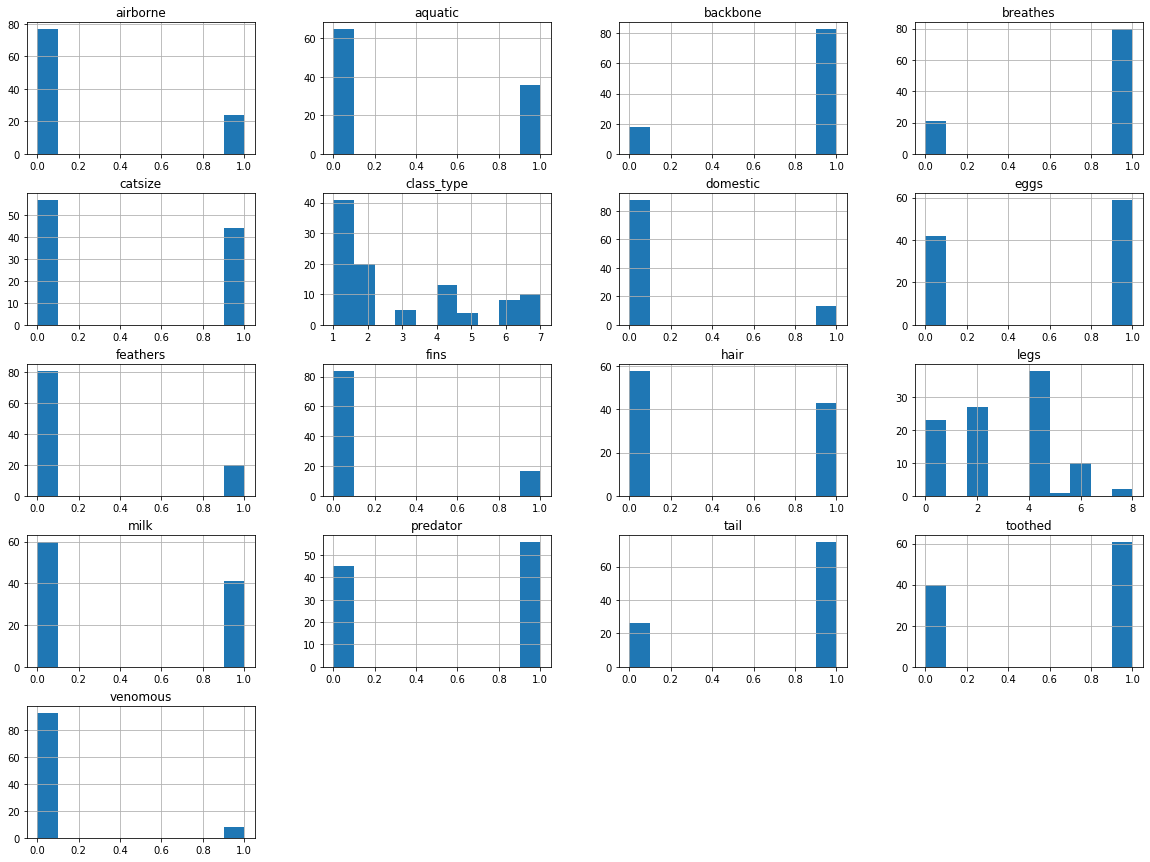

In [21]:
dataset.hist(figsize=(20,15))

## A variável 'class_type' são as nossas classes. Somente a característica 'legs' possui valores sem ser 0 e 1 que, no caso, são os números de patas.

In [22]:
#Vamos analisar a distribuição da coluna 'animal_name':

dataset['animal_name'].value_counts()

frog        2
fruitbat    1
platypus    1
dogfish     1
rhea        1
           ..
vole        1
duck        1
cavy        1
hawk        1
goat        1
Name: animal_name, Length: 100, dtype: int64

### No dataset inteiro só temos um animal que se repete, o 'frog'. Essa coluna não é interessante para o nosso problema de classificar os tipos de animais. Portanto, iremos retirá-la.

In [23]:
# Removendo a coluna e já incorporando no próprio Dataset (inplace = True)

dataset.drop(['animal_name'], axis = 1, inplace = True)

## Vamos analisar a correlação:

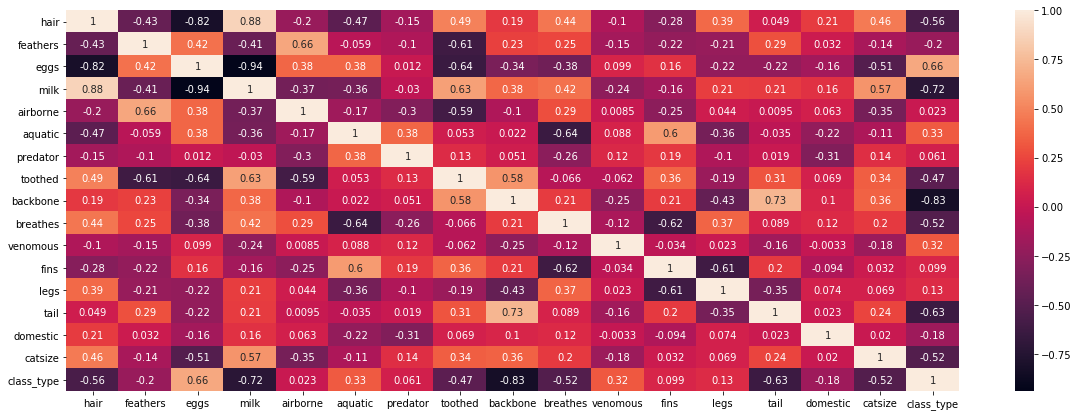

In [24]:
plt.figure(figsize=(20,7))
sb.heatmap(dataset.corr(), annot = True)

### As características 'eggs' e 'milk' possuem uma correlação muito forte. Por esse motivo, iremos retirar a coluna 'eggs' do nosso dataset.

In [25]:
# Removendo a coluna e já incorporando no próprio Dataset (inplace = True)

dataset.drop(['eggs'], axis = 1, inplace = True)

### Separar a nossa variável alvo das características:

In [26]:
X = dataset.drop(['class_type'], axis = 1).values
y = dataset['class_type'].values

### Próximo passo será normalizar os dados:

In [27]:
scaler = StandardScaler() 
X = scaler.fit_transform(X) 

## Vamos separar os dados de treino e testes (sendo 35% para testes)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state = 42)

### Executar o KNN de K = 1 até 25 e verificar qual deles possui a melhor acurácia.

In [29]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.9444444444444444, 0.9444444444444444, 0.9166666666666666, 0.9166666666666666, 0.8888888888888888, 0.8888888888888888, 0.7777777777777778, 0.75, 0.75, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.75, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.6944444444444444, 0.6944444444444444]


### Gráfico da acurácia em função do valor de K:

Text(0, 0.5, 'Testing Accuracy')

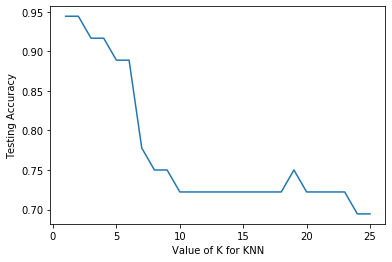

In [30]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### A melhor acurácia é de 0,94 para K = 1. Vamos executar o KNN para K = 1:

In [31]:
best_KNN = KNeighborsClassifier(n_neighbors=1)
best_KNN.fit(X_train, y_train)
y_pred = best_KNN.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9444444444444444
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         4
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         2
           5       1.00      0.50      0.67         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        36
   macro avg       0.93      0.88      0.88        36
weighted avg       0.96      0.94      0.94        36



### Matriz de confusão:

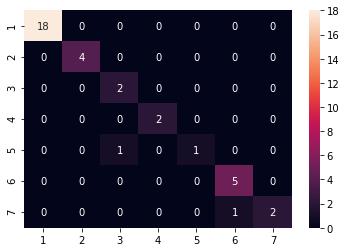

In [35]:
sb.heatmap(metrics.confusion_matrix(y_test, y_pred),
           annot = True, fmt = "d", xticklabels = range(1,8), yticklabels = range(1,8))

### O classificador foi bem nos testes, errando em 2 casos. Para ter um modelo mais robusto, seria interessante ter um dataset maior.